In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier #Import Decision Tree Classifier
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#This is acomment

In [7]:
#Upload The Datset to work Area
#Upload the Dataset
from google.colab import files
dataset = files.upload()

Saving heart_failure_clinical_records_dataset_1.csv to heart_failure_clinical_records_dataset_1 (1).csv


In [9]:
#Read the Dataset And display 
dataset = pd.read_csv("heart_failure_clinical_records_dataset_1.csv")

In [10]:
dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [12]:
dataset.drop(["time"], axis = 1, inplace = True)

In [13]:
dataset.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


In [15]:
dataset.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
DEATH_EVENT                 0
dtype: int64

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 28.2 KB


In [20]:
dataset.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,1.00000


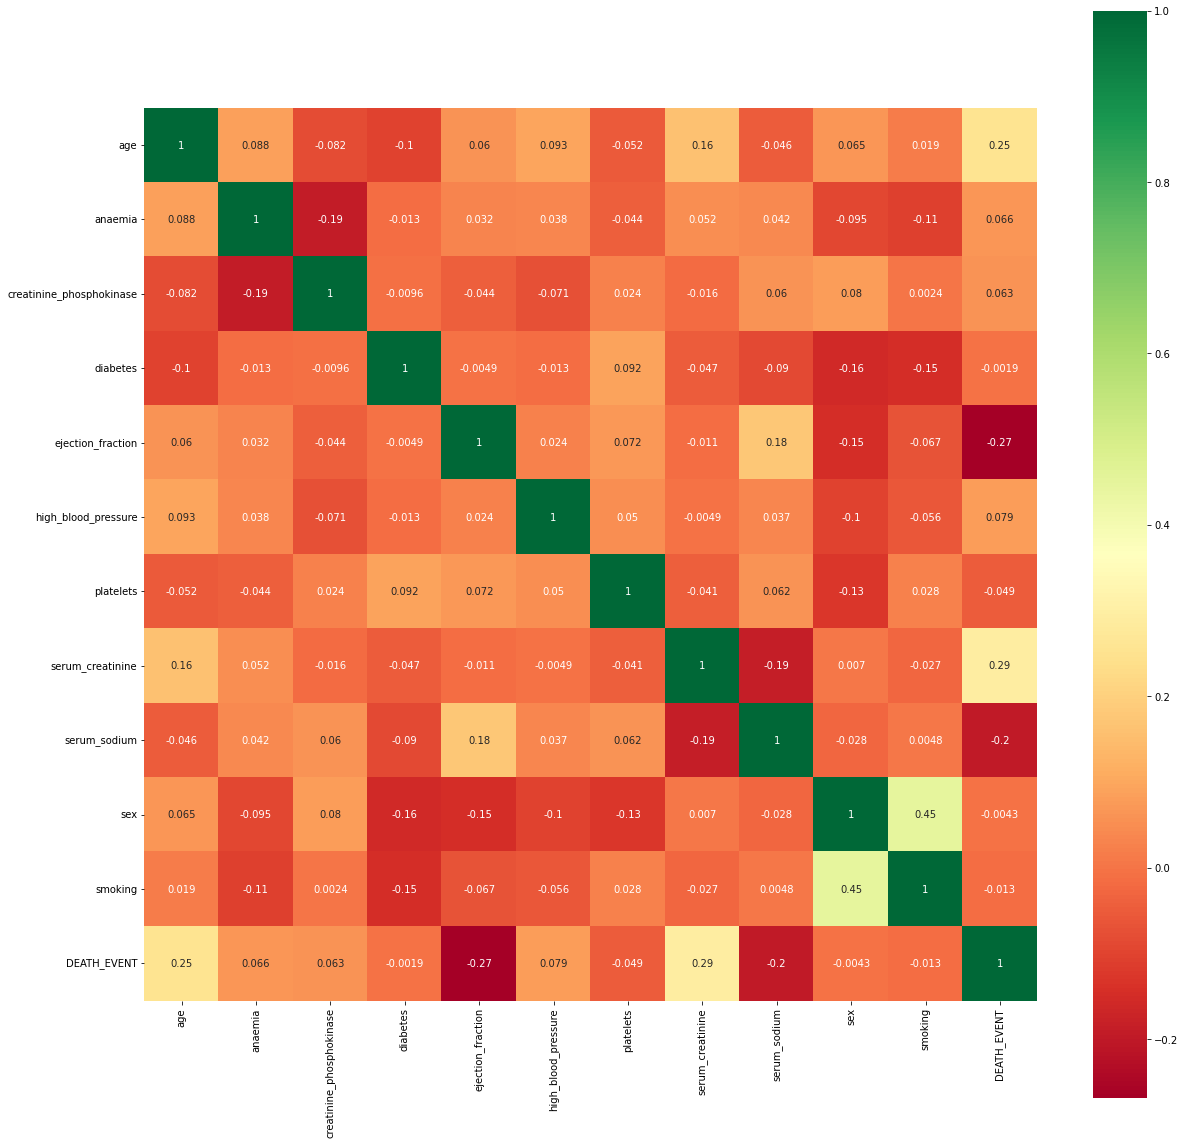

In [21]:
#Co-relation matrix
plt.figure(figsize=(20,20))
p=sns.heatmap(dataset.corr(), annot=True,cmap='RdYlGn',square=True)  

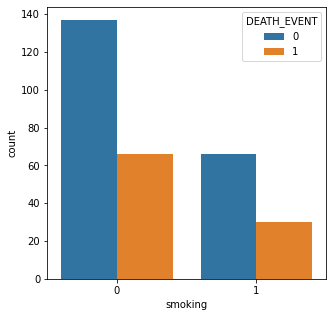

In [22]:
plt.figure(figsize=(5,5))
sns.countplot(x ="smoking", data=dataset, hue ="DEATH_EVENT");

In [24]:
x = dataset.drop("DEATH_EVENT", axis=1)
y = dataset.DEATH_EVENT
print(x,y)

      age  anaemia  creatinine_phosphokinase  ...  serum_sodium  sex  smoking
0    75.0        0                       582  ...           130    1        0
1    55.0        0                      7861  ...           136    1        0
2    65.0        0                       146  ...           129    1        1
3    50.0        1                       111  ...           137    1        0
4    65.0        1                       160  ...           116    0        0
..    ...      ...                       ...  ...           ...  ...      ...
294  62.0        0                        61  ...           143    1        1
295  55.0        0                      1820  ...           139    0        0
296  45.0        0                      2060  ...           138    0        0
297  45.0        0                      2413  ...           140    1        1
298  50.0        0                       196  ...           136    1        1

[299 rows x 11 columns] 0      1
1      1
2      1
3      1
4  

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [27]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

In [31]:
y_pred = clf.predict(x_test)


In [32]:
print(y_pred)

[1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1]


In [33]:
print(y_test)

65     1
84     1
98     0
169    0
170    0
6      1
174    0
0      1
179    0
296    0
77     0
27     1
59     1
106    0
96     0
213    1
120    0
89     0
269    0
178    0
154    0
260    0
234    0
12     1
223    0
172    0
244    0
294    0
159    0
34     1
262    1
148    1
63     1
100    0
74     1
118    0
56     0
252    0
116    0
31     1
26     1
64     0
5      1
153    0
183    1
232    0
90     0
279    0
1      1
112    0
70     0
285    0
290    0
68     1
9      1
229    0
166    0
69     1
243    0
216    0
Name: DEATH_EVENT, dtype: int64


In [36]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7166666666666667
